# Computing Stellar Mass Function

This notebook demonstrates how to:
1. Set the base directory for GALFORM outputs
2. Read data from a snapshot
3. Compute the stellar mass function
4. Plot the results

The stellar mass function (SMF) shows the number density of galaxies as a function of their stellar mass.

## 1. Import Libraries

First, let's import the necessary libraries.

In [1]:
# Add package to path
import sys
from pathlib import Path
project_root = Path.cwd().parent
if str(project_root / 'src') not in sys.path:
    sys.path.insert(0, str(project_root / 'src'))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from galform_analysis.config import get_base_dir
from galform_analysis.analysis.smf import compute_smf_avg_by_snapshot

## 2. Configure Base Directory

Set the path to your GALFORM output directory. Update this path to match your setup!

In [2]:
# The BASE_DIR is already configured in config.py
# You can override it if needed using: set_base_dir('/your/path')
base_dir = get_base_dir()
print(f"Using GALFORM base directory: {base_dir}")

Using GALFORM base directory: /cosma5/data/durham/dc-hick2/Galform_Out/L800/gp14


## 3. Select Snapshot to Analyze

Choose which redshift snapshot to analyze (e.g., iz99 for z≈0).

In [3]:
# Define snapshot to analyze (e.g., iz155 for z~0.5)
snapshot = 'iz155'
iz_path = base_dir / snapshot

print(f"Analyzing snapshot: {snapshot}")
print(f"Path: {iz_path}")
print(f"Exists: {iz_path.exists()}")

Analyzing snapshot: iz155
Path: /cosma5/data/durham/dc-hick2/Galform_Out/L800/gp14/iz155
Exists: True


## 4. Compute Stellar Mass Function

Now we compute the SMF by averaging across all subvolumes in the snapshot.

In [ ]:
# Compute stellar mass function
print("Computing stellar mass function...")
smf = compute_smf_avg_by_snapshot(
    str(iz_path),
    bins=np.arange(8.0, 12.6, 0.2)
)

if smf is None:
    print("ERROR: No data found!")
else:
    print("✓ Success!")
    print(f"  Redshift: z = {smf['z']:.2f}")
    print(f"  Used {smf['n_used']}/{smf['n_total']} subvolumes")
    print(f"  Mass range: {smf['centers'].min():.1f} - {smf['centers'].max():.1f} log(M☉)")

Computing stellar mass function...


## 5. Plot the Results

Create a publication-quality plot of the stellar mass function.

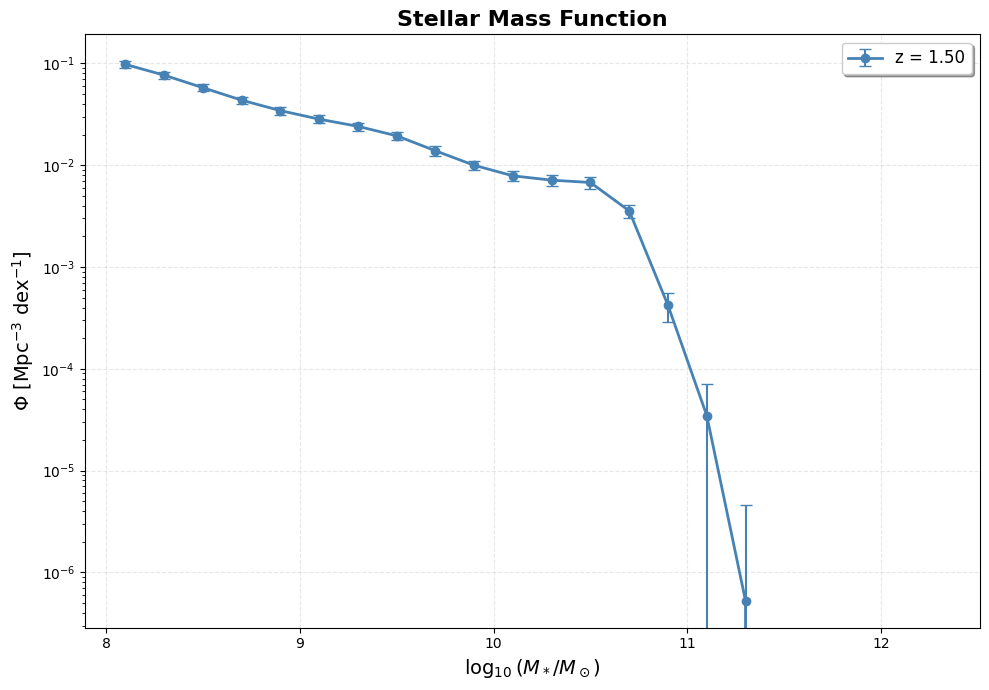

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot SMF with error bars
ax.errorbar(
    smf['centers'],
    smf['phi'],
    yerr=smf['phi_std'],
    fmt='o-',
    color='steelblue',
    label=f"z = {smf['z']:.2f}",
    capsize=4,
    markersize=6,
    linewidth=2,
    elinewidth=1.5
)

# Formatting
ax.set_yscale('log')
ax.set_xlabel(r'$\\log_{10}(M_*/M_\\odot)$', fontsize=14)
ax.set_ylabel(r'$\\Phi$ [Mpc$^{-3}$ dex$^{-1}$]', fontsize=14)
ax.set_title('Stellar Mass Function', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=12, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

# Save the figure to the correct subfolder
plot_dir = 'examples/plots/smf'
os.makedirs(plot_dir, exist_ok=True)
plt.savefig(os.path.join(plot_dir, 'smf_example.png'), dpi=150, bbox_inches='tight')

# Save the data to the correct subfolder
data_dir = 'examples/plots/_plots_data/smf'
os.makedirs(data_dir, exist_ok=True)
df = pd.DataFrame({
    'log(M*/M☉)': smf['centers'],
    'Φ [Mpc⁻³ dex⁻¹]': smf['phi'],
    'σ(Φ)': smf['phi_std']
})
df.to_csv(os.path.join(data_dir, 'smf_example.csv'), index=False)

## 6. Inspect the Data

Let's look at some of the actual values.

In [ ]:
# Show a few data points
df = pd.DataFrame({
    'log(M*/M☉)': smf['centers'],
    'Φ [Mpc⁻³ dex⁻¹]': smf['phi'],
    'σ(Φ)': smf['phi_std']
})

print("\nFirst 10 mass bins:")
print(df.head(10).to_string(index=False))

print(f"\nPeak of SMF at log(M*/M☉) ≈ {smf['centers'][np.argmax(smf['phi'])]:.2f}")


First 10 mass bins:
 log(M*/M☉)  Φ [Mpc⁻³ dex⁻¹]     σ(Φ)
        8.1         0.097982 0.007105
        8.3         0.076816 0.005708
        8.5         0.057840 0.004493
        8.7         0.043603 0.003568
        8.9         0.034432 0.002988
        9.1         0.028379 0.002526
        9.3         0.024133 0.002179
        9.5         0.019478 0.001909
        9.7         0.013880 0.001424
        9.9         0.009991 0.001098

Peak of SMF at log(M*/M☉) ≈ 8.10


In [ ]:
# Show a few data points
df = pd.DataFrame({
    'log(M*/M☉)': smf['centers'],
    'Φ [Mpc⁻³ dex⁻¹]': smf['phi'],
    'σ(Φ)': smf['phi_std']
})

print("\nFirst 10 mass bins:")
print(df.head(10).to_string(index=False))

print(f"\nPeak of SMF at log(M*/M☉) ≈ {smf['centers'][np.argmax(smf['phi'])]:.2f}")


First 10 mass bins:
 log(M*/M☉)  Φ [Mpc⁻³ dex⁻¹]     σ(Φ)
        8.1         0.097982 0.007105
        8.3         0.076816 0.005708
        8.5         0.057840 0.004493
        8.7         0.043603 0.003568
        8.9         0.034432 0.002988
        9.1         0.028379 0.002526
        9.3         0.024133 0.002179
        9.5         0.019478 0.001909
        9.7         0.013880 0.001424
        9.9         0.009991 0.001098

Peak of SMF at log(M*/M☉) ≈ 8.10
